Ejercicio clase 2017

Determínese el valor mínimo de la relación X=W0/WPL , las masas iniciales de cada etapa, las masas de cada escalón y las masas de propulsante en cada uno de ellos para dicho valor mínimo, de un vehículo de tres etapas, cuya misión sería situar en órbita circular de altitud 200km, una carga de pago de 2.000kg, en un lanzamiento hacia el Este desde una base situada en el Ecuador Terrestre. Las relaciones estructurales de los escalones primero, segundo y tercero son iguales a 0,1 y los propulsantes tienen impulsos específicos de 250, 300 y 350s respectivamente.
Considérese:
- Pérdidas de velocidad por gravedad y resistencia aerodinámica 1.800m/s. 
- velocidad de rotación de la Tierra ωT = 7,2722e-5 rad/s.
- Radio de la Tierra = 6.370km.
- Constante gravitacional de la Tierra μ= 398600,4418km3/s2,
- g0 = 9,81m/s2.

In [1]:
#primero importamos
import numpy as np
#importar numpy para calculo numérico
from sympy import *
#importar sympy para calculo simbolico
init_printing(use_latex=True)
#importar optimize para resolver numericamente 
from scipy import optimize

In [2]:
#declaramos variables
#Ispn Impulso específico [s]
Isp1 = symbols('Isp1')
Isp2 = symbols('Isp2')
Isp3 = symbols('Isp2')
#σi factor estructural [adimensional]
o1 = symbols('o1')
o2 = symbols('o2')
o3 = symbols('o3')
#xi relaciones másicas [adimensional] x1=m01/m02 x2=m02/mo3 x3=m03/mpl
x1 = symbols('x1')
x2 = symbols('x2')
x3 = symbols('x3')
#X relación másica misil [adimensional]
X = symbols('X')
#masa carga util (pay load) mpl [kg]
mpl = symbols('mpl')
#incremento total de velocidad [m/s]
VIexpresion = Function('VI')(x1)
#VIdato = symbols('VIdato')
#mi masa etapa [kg]
m1 = symbols('m1')
m2 = symbols('m2')
m3 = symbols('m3')
#m0i masa inicial de etapa [kg]
m01 = symbols('m01')
m02 = symbols('m02')
m03 = symbols('m03')
#mpi masa propulsante etapa [kg] mpi=mi(1-σi)
mp1 = symbols('mp1')
mp2 = symbols('mp2')
mp3 = symbols('mp3')
#g0 gravedad g0=9,81m/s2
g0 = symbols('g0')
#cosas propias de los problemas en los que hay que calcular Vi
#altura h [m]
h = symbols('h')
#Radio de la tierra [m]
R = symbols('R')
#wt velocidad de rotacion de la tierra [rad/s]
wt = symbols('wt')
#mu constante gravitacional de la Tierra [mu]
mu = symbols('mu')
#Vorb Velocidad orbital [m/s]
Vorb = symbols('Vorb')
#Vrot Velocidad rotacion [m/s]
Vrot = symbols('Vrot')
#Vloss Velocidad de perdida [m/s]
Vloss = symbols('Vloss')

#ecuaciones propias del problema

Vi=Vorb-Vrot+Vloss

Vrot=wt*R
Vorb=(mu/(R+h))**0.5





X = x1*x2*x3

m03=mpl*x3
m02=m03*x2
m01=m02*x1

m1=m01-m02
m2=m02-m03
m3=m03-mpl

mp1=m1*(1-o1)
mp2=m2*(1-o2)
mp3=m3*(1-o3)



f1=Eq(Isp1*(1-o1*(x1/(o1*x1+(1-o1)))),Isp2*(1-o2*(x2/(o2*x2+(1-o2)))))

f2=Eq(Isp2*(1-o2*(x2/(o2*x2+(1-o2)))),Isp3*(1-o3*(x3/(o3*x3+(1-o3)))))


f3=Eq(g0*(Isp1*log(x1/(o1*x1+(1-o1)))+Isp2*log(x2/(o2*x2+(1-o2)))+Isp3*log(x3/(o3*x3+(1-o3)))),Vi)


In [3]:
R=6370000 #en metros
wt=7.2722e-5
mu=398600.4418e9

Vloss=1800
h=200000

Isp1=250
Isp2=300
Isp3=350

mpl=2000

o1=0.1
o2=0.1
o3=0.1

g0=9.81

In [4]:
#Ecuaciones para obtener Vi de lanzamiento

Vorb=(mu/(R+h))**0.5
Vrot=wt*R
Vi=Vorb-Vrot+Vloss
Vi

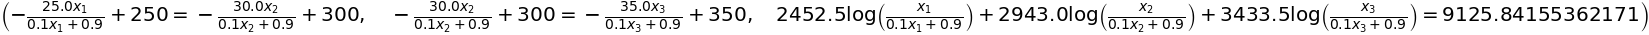

In [8]:
#Ecauciones que relacionan las etapas
f1=Eq(Isp1*(1-o1*(x1/(o1*x1+(1-o1)))),Isp2*(1-o2*(x2/(o2*x2+(1-o2)))))

f2=Eq(Isp2*(1-o2*(x2/(o2*x2+(1-o2)))),Isp3*(1-o3*(x3/(o3*x3+(1-o3)))))


f1,f2

In [9]:
#hayamos relaciones entre las x
#el output de un solve es una lista de symbols, por eso debo guardar un elemento en una nueva variable
x2sol = solve(f1,x2)
x3sol = solve(f2,x3)
x2=x2sol[0]
x3=x3sol[0]
x3 = x3.subs('x2',x2)

x2,x3

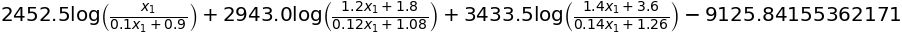

In [10]:
#definimos la ecuación de Vi (puesta para iteral)
f3=g0*(Isp1*log(x1/(o1*x1+(1-o1)))+Isp2*log(x2/(o2*x2+(1-o2)))+Isp3*log(x3/(o3*x3+(1-o3))))-Vi
f3

In [11]:
#preparamos f3 para resolver numericamente
f3sol=lambdify(x1,f3)

In [12]:
#resolvemos iterando para x1
x1= optimize.newton(f3sol,1)


In [17]:
#print de soluciones y calculo de masas

#sustituyo el valor numerico de x1
x2=x2.subs('x1',x1)
x3=x3.subs('x1',x1)

X = x1*x2*x3

m03=mpl*x3
m02=m03*x2
m01=m02*x1

m1=m01-m02
m2=m02-m03
m3=m03-mpl

mp1=m1*(1-o1)
mp2=m2*(1-o2)
mp3=m3*(1-o3)



print('x1=',x1,'   ','x2=',x2,'   ','x3=',x3,'   ')
print('X=',X)
print('m01=',m01,'kg','   ','m02=',m02,'kg','   ','m03=',m03,'kg')
print('m1=',m1,'kg','    ','m2=',m2,'kg','    ','m3=',m3,'kg')
print('mp1=',mp1,'kg','   ','mp2=',mp2,'kg','    ','mp3=',mp3,'kg')

x1= 1.7057398177555982     x2= 3.84688778130672     x3= 5.98803574485784    
X= 39.2922310523567
m01= 78584.4621047133 kg     m02= 46070.6030818430 kg     m03= 11976.0714897157 kg
m1= 32513.8590228704 kg      m2= 34094.5315921273 kg      m3= 9976.07148971568 kg
mp1= 29262.4731205833 kg     mp2= 30685.0784329146 kg      mp3= 8978.46434074411 kg
